## Assignment 1

### Question 2

2. Do the same regression steps described above, this time with a linear model (SGD; 010-Regression-DistanceToGalaxies.ipynb, Jan20). Use the default parameters which can be found on the SKlearn website (see page "sklearn.linear_model.SGDRegressor"). Again, plot the performance plots and discuss the model performances and the results. Compare the value of your model's weights using the Attributes "coef_," described on the website. For example, if your model's name is "reg" then use "reg.coef_" to see the values of the weights.

### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing, regressors, feature extraction
* seaborn just to have a nice plotting surface

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

# Use seaborn to set the plotting style
sns.set_style('whitegrid')

print('Packages imported.')

Packages imported.


### Load the data and display the first 5 rows. Additionally, look at the column information to see if cleaning is necessary

In [2]:
# Load the melanoma data using pandas
skin_data = pd.read_csv('skin_cancer.csv')

# Display the first 5 rows of data
skin_data.head(n=5)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [3]:
# Display the info about each of the columns to see if cleaning is necessary
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


### Look at the histograms of the data before normalization

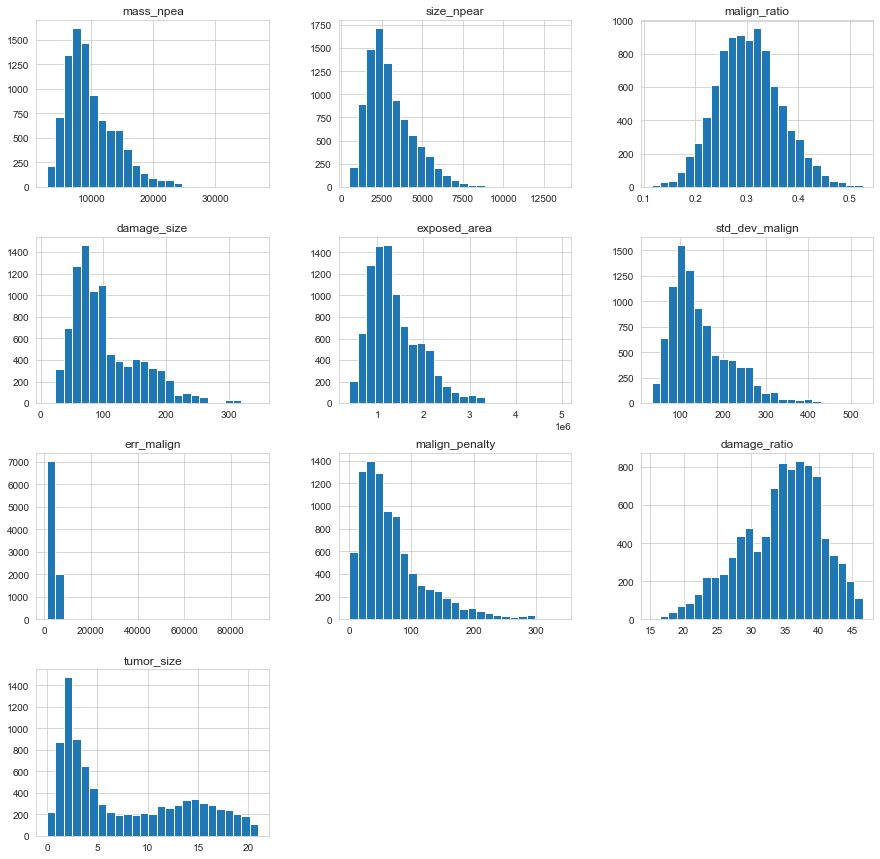

In [4]:
# All data histograms so that we can look at the distributions before and after normalization

skin_data.hist(bins=25, figsize=(15, 15))
plt.show()

### Set the input and target data
Target data is 'tumor_size' or the size of the skin cancer tumor

Also double check the size of the input and target arrays are the same

In [5]:
# Set the input and target data
input_skin = skin_data[['mass_npea', 'size_npear', 'malign_ratio', 'damage_size', 'exposed_area', 'std_dev_malign', 
                        'err_malign', 'malign_penalty', 'damage_ratio']].values
target_skin = skin_data['tumor_size'].values

# Print the shapes of the data to make sure the size is the same (number of rows)
print(f'Input shape: {np.shape(input_skin)}')
print(f'Target shape: {np.shape(target_skin)}')

Input shape: (9146, 9)
Target shape: (9146,)


### Separate the input and target randomly into a training and validation set
### Validation test is 25% of the 9,146 rows

In [6]:
# Training input, validation input, training target, validation target
# Separately
input_tr, input_va, target_tr, target_va = train_test_split(input_skin, target_skin, test_size=0.25)

# Print the new sizes of the various training and validation sets
print(f'Training set shapes: {np.shape(input_tr)}, {np.shape(target_tr)}')
print(f'Validation set shapes: {np.shape(input_va)}, {np.shape(target_va)}')

Training set shapes: (6859, 9), (6859,)
Validation set shapes: (2287, 9), (2287,)


### Check that the shapes of the distributions of the training and validation sets are roughly the same


Text(0.5, 1.0, 'Validation set')

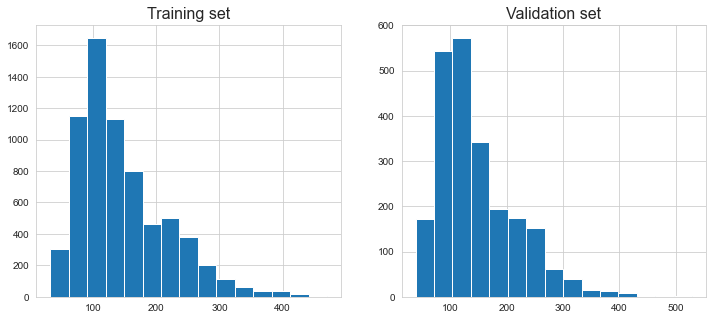

In [7]:
# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

### The columns all look like they follow the same distribution, so that's good!

### Set up Stochastic Gradient Descent regressor for the un-normalized data with the default settings.

c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


Text(26, 1.5730396341754125e+20, '$\\mu=-554573906396554919936.0000$\n$\\mathrm{med}=-501313771583672877056.0000$\n$\\sigma=222966274546458886144.0000$')

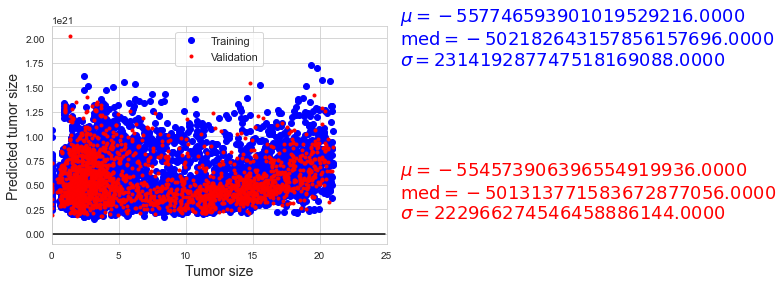

In [8]:
# The SGD regressor, with default settings according to sklearn.linear_model.SGDRegressor
reg = SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.0001, l1_ratio=0.15, 
                   fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, 
                   verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', 
                   eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, 
                   n_iter_no_change=5, warm_start=False, average=False)

# Fit the model with un-normalized training set
reg.fit(input_tr, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_pred = reg.predict(input_tr)
target_va_pred = reg.predict(input_va)

# Set up the figure to plot the results for both the training and validations set
fig = plt.figure(figsize=(6, 4))
plt.plot(target_tr, target_tr_pred, 'ob') # Training actual vs. predicted in blue
plt.plot(target_va, target_va_pred, '.r')  # Validation actual vs. predicted in red

# Plot a line of slope 1 and intercept 0 to see how well the data agrees with the prediction
plt.plot(np.arange(0, 25, .1),  np.arange(0, 25, .1), '-k')
plt.xlabel('Tumor size', fontsize=14)
plt.ylabel('Predicted tumor size', fontsize=14)
plt.legend(['Training', 'Validation'], fontsize=11)
plt.xlim([0,25])
# plt.ylim([1E0,8E20])

# Calculate the statistical information for the predicted sets
mu_tr = np.mean(target_tr - target_tr_pred)
median_tr = np.median(target_tr - target_tr_pred)
sigma_tr = np.std(target_tr - target_tr_pred)

mu_va = np.mean(target_va - target_va_pred)
median_va = np.median(target_va - target_va_pred)
sigma_va = np.std(target_va - target_va_pred)

# Add the statistical information regarding training and validation predictions to the side of the plot
text_tr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_tr, median_tr, sigma_tr)
text_va = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_va, median_va, sigma_va)
plt.text(26, np.max(target_tr_pred), text_tr, color='b', fontsize=18)
plt.text(26, np.min(target_tr_pred), text_va, color='r', fontsize=18)

### For the un-normalized data the SGD regressor is pretty useless with the default parameters. The mean, median, and standard deviations of the difference between the real and predicted values is massive. And it behaves wildly differently when running it again, flipping between negative and positive.

### Now investigate the differences bewteen the actual and the predicted values in a few different ways. First by looking at the distribution.

mean =  5.577465939010195e+20
median =  5.0218264315785616e+20
SD =  2.3141928774751817e+20


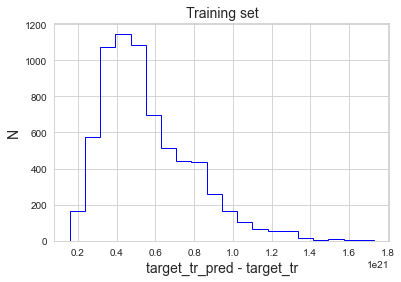

In [9]:
# Inspect the distribution of the difference between the predicted and actual values for the training set 
plt.hist(target_tr_pred - target_tr, 20, color='b', histtype='step')
plt.xlabel('target_tr_pred - target_tr', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Training set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_tr_pred - target_tr))
print ('median = ', np.median(target_tr_pred - target_tr))
print ('SD = ', np.std(target_tr_pred - target_tr))

mean =  5.545739063965549e+20
median =  5.013137715836729e+20
SD =  2.229662745464589e+20


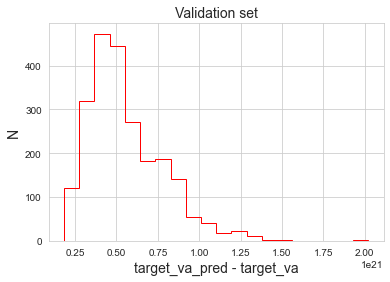

In [10]:
# Inspect the distribution of the difference between the predicted and actual values for the validation set 
plt.hist(target_va_pred - target_va, 20, color='r', histtype='step')
plt.xlabel('target_va_pred - target_va', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Validation set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_va_pred - target_va))
print ('median = ', np.median(target_va_pred - target_va))
print ('SD = ', np.std(target_va_pred - target_va))

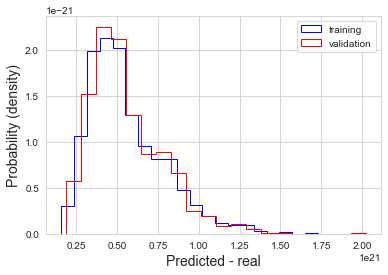

In [11]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.
plt.hist(target_tr_pred - target_tr, 20, color='b', histtype='step', density=True, label='training')
plt.hist(target_va_pred - target_va, 20, color='r', histtype='step', density=True, label='validation')
plt.xlabel('Predicted - real', fontsize=14)
plt.ylabel('Probability (density)', fontsize=14)
plt.legend()

### The one good thing is that the training and validation sets behave the same, but the Gaussian is more heavily weighted on one side depending on what the model spit out, with a bit of tail in that direction.

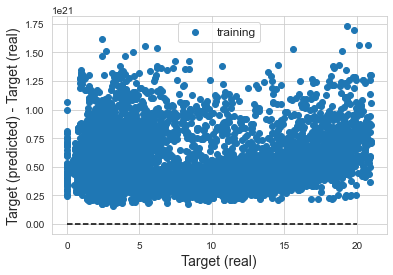

In [12]:
# Inspecting systematic errors for the training set
plt.scatter(target_tr, target_tr_pred - target_tr, label='training')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,20], [0,0], '--k')
plt.legend(fontsize=12)

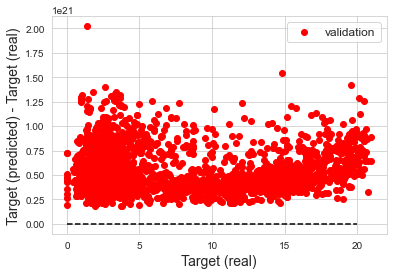

In [13]:
# Inspecting systematic errors for the validation set
plt.scatter(target_va, target_va_pred - target_va, label='validation', color='r')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,20], [0,0], '--k')
plt.legend(fontsize=12)

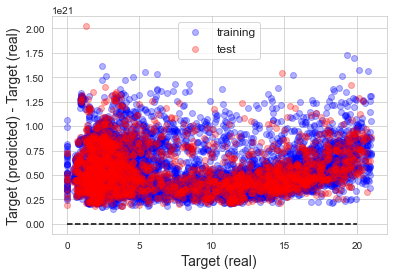

In [14]:
# Inspecting systematic errors for the training set and validation set together 
plt.scatter(target_tr, target_tr_pred - target_tr, label='training', color='b', alpha=.3)
plt.scatter(target_va, target_va_pred - target_va, label='test', color='r', alpha=.3)
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,20], [0,0], '--k')
plt.legend(fontsize=12)

### Again, good agreement between training and test data, but massive systematic errors are seen in either the positive or negative (depending on the model the SGD resgressor spits out after each run). It doesn't really even seem to follow an average or anything. It's a fairly useless model with un-normalized data.

### Investigate the coefficients of the model when the data was un-normalized, we'll compare them at the end to the coefficients of the model when the data was normalized.

In [15]:
# Get the coefficients of the model
coeffs_before = reg.coef_
print(f'Number of coefficients before normalization: {np.size(coeffs_before)}')

Number of coefficients before normalization: 9


## Now do the same thing, but normalize the data first

In [16]:
# Apply a standard normalization to the input data
stnd_scaler = StandardScaler().fit(input_tr)
input_tr_norm = stnd_scaler.transform(input_tr)  # Normalize training data
input_va_norm = stnd_scaler.transform(input_va)  # Normalize the validation data

### Look at the histograms of the data after normalization

Text(0.5, 1.0, 'Validation set')

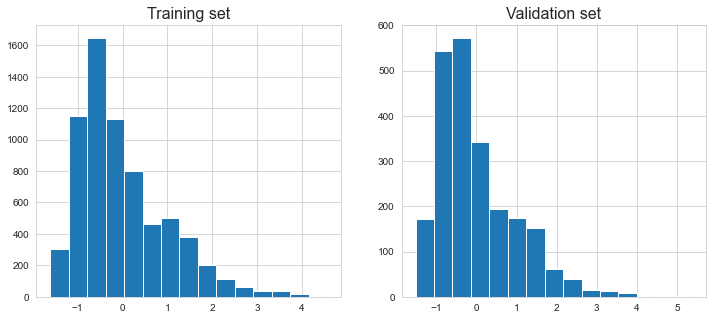

In [17]:
# Examine the input data after normalization for both the training and validation sets

# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr_norm[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va_norm[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

### The columns all look like they follow the same distribution, so that's good!

### Set up the KNN regressor again for the normalized data, with default parameters.

c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


Text(26, 1.2, '$\\mu=0.2183$\n$\\mathrm{med}=-0.7365$\n$\\sigma=5.2288$')

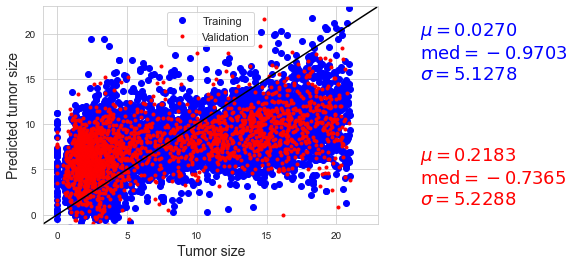

In [18]:
# The SGD regressor, with default settings according to sklearn.linear_model.SGDRegressor
reg_norm = SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.0001, l1_ratio=0.15, 
                   fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, 
                   verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', 
                   eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, 
                   n_iter_no_change=5, warm_start=False, average=False)

# Fit the model with the normalized training set
reg_norm.fit(input_tr_norm, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_pred_norm = reg_norm.predict(input_tr_norm)  
target_va_pred_norm = reg_norm.predict(input_va_norm)

# Set up the figure to plot the results for both the training and validations set
fig = plt.figure(figsize=(6, 4))
plt.plot(target_tr, target_tr_pred_norm, 'ob') # Training actual vs. predicted in blue
plt.plot(target_va, target_va_pred_norm, '.r')  # Validation actual vs. predicted in red

# Plot a line of slope 1 and intercept 0 to see how well the data agrees with the prediction
plt.plot(np.arange(-1, 23, .1),  np.arange(-1, 23, .1), '-k')
plt.xlabel('Tumor size', fontsize=14)
plt.ylabel('Predicted tumor size', fontsize=14)
plt.legend(['Training', 'Validation'], fontsize=11)
plt.xlim([-1, 23])
plt.ylim([-1, 23])

# Calculate the statistical information for the predicted sets
mu_tr_norm = np.mean(target_tr - target_tr_pred_norm)
median_tr_norm = np.median(target_tr - target_tr_pred_norm)
sigma_tr_norm = np.std(target_tr - target_tr_pred_norm)

mu_va_norm = np.mean(target_va - target_va_pred_norm)
median_va_norm = np.median(target_va - target_va_pred_norm)
sigma_va_norm = np.std(target_va - target_va_pred_norm)

# Add the statistical information regarding training and validation predictions to the side of the plot
text_tr_norm = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_tr_norm, median_tr_norm, sigma_tr_norm)
text_va_norm = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_va_norm, median_va_norm, sigma_va_norm)
plt.text(26, 15, text_tr_norm, color='b', fontsize=18)
plt.text(26, 1.2, text_va_norm, color='r', fontsize=18)

### The model behaves much better with normalized data, with actual reasonable numbers coming out for the predicted tumor size. And there is good agreement between the training and validations sets. It's behaving more like the KNN model now.

### Compare the actual and the predicted value is a couple ways. First with the distribution of the difference between the real and predicted values.

mean =  -0.027028954289855564
median =  0.9703345889453003
SD =  5.127797816100637


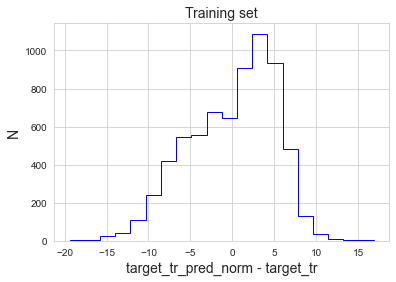

In [19]:
# Inspect the distribution of the difference between the predicted and actual values for the training set 
plt.hist(target_tr_pred_norm - target_tr, 20, color='b', histtype='step')
plt.xlabel('target_tr_pred_norm - target_tr', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Training set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_tr_pred_norm - target_tr))
print ('median = ', np.median(target_tr_pred_norm - target_tr))
print ('SD = ', np.std(target_tr_pred_norm - target_tr))

mean =  -0.2182657705799865
median =  0.736473505090947
SD =  5.2287643651847535


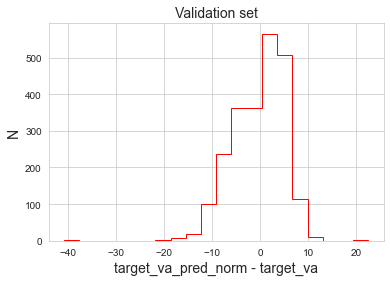

In [20]:
# Inspect the distribution of the difference between the predicted and actual values for the validation set 
plt.hist(target_va_pred_norm - target_va, 20, color='r', histtype='step')
plt.xlabel('target_va_pred_norm - target_va', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Validation set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_va_pred_norm - target_va))
print ('median = ', np.median(target_va_pred_norm - target_va))
print ('SD = ', np.std(target_va_pred_norm - target_va))

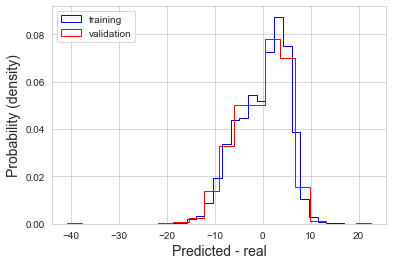

In [21]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.
plt.hist(target_tr_pred_norm - target_tr, 20, color='b', histtype='step', density=True, label='training')
plt.hist(target_va_pred_norm - target_va, 20, color='r', histtype='step', density=True, label='validation')
plt.xlabel('Predicted - real', fontsize=14)
plt.ylabel('Probability (density)', fontsize=14)
plt.legend()

### Still a bit of the same problem as the un-normalized data, with a more of the distribution existing on one side, in this case the left side. There is a bit of a tail in that direction as well.

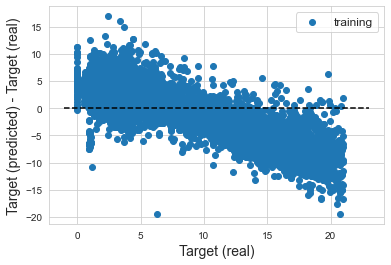

In [22]:
# Inspecting systematic errors for the training set
plt.scatter(target_tr, target_tr_pred_norm - target_tr, label='training')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1, 23], [0, 0], '--k')
plt.legend(fontsize=12)

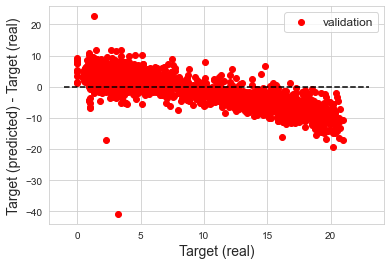

In [23]:
# Inspecting systematic errors for the validation set
plt.scatter(target_va, target_va_pred_norm - target_va, label='validation', color='r')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1, 23], [0, 0], '--k')
plt.legend(fontsize=12)

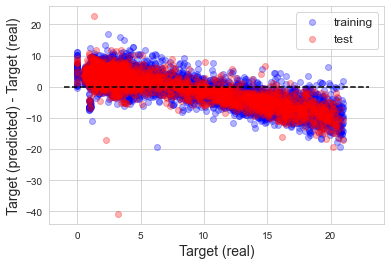

In [24]:
# Inspecting systematic errors for the training set and validation set together 
plt.scatter(target_tr, target_tr_pred_norm - target_tr, label='training', color='b', alpha=.3)
plt.scatter(target_va, target_va_pred_norm - target_va, label='test', color='r', alpha=.3)
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1, 23], [0, 0], '--k')
# plt.ylim([-0.5, 0.5])
plt.legend(fontsize=12)

### There are a few outliers, but the systematic error is largely following the same pattern as the KNN model. We essentially have the model predicting an average. With smaller tumors have positive errors and larger tumors having negative errors.

### Investigate the coefficients of the model after the data was normalized

In [25]:
# Get the coefficients of the model
coeffs_after = reg_norm.coef_
print(f'Number of coefficients after normalization: {np.size(coeffs_after)}')

Number of coefficients after normalization: 9


### Plot the coefficients before and after to see the differences

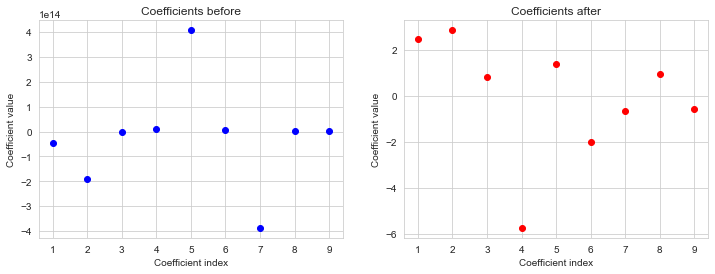

In [29]:
# Coefficient figure
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(np.arange(1, len(coeffs_before)+1), coeffs_before, color='blue')
ax[0].set_xlabel('Coefficient index')
ax[0].set_ylabel('Coefficient value')
ax[0].set_title('Coefficients before')

ax[1].scatter(np.arange(1, len(coeffs_after)+1), coeffs_after, color='red')
ax[1].set_xlabel('Coefficient index')
ax[1].set_ylabel('Coefficient value')
ax[1].set_title('Coefficients after')


plt.show()

### We can see the importance of normalizing the data for the SGD regressor here. The un-normalized coefficients are huge and skew wildely, whereas the coefficients after normalization behave much more reasonably. 

## The model performs much better with normalized data. Whereas it didn't affect the model as much with KNN, data normalization is hugely important for SGD regressors as one feature can massively affect the model more than the others. Again, better feature extraction and hyper-parameter settings will hopefully give us better performance.